# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad de las Semanas 5 y 6**
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   Javier Alejandro Pérez Garza - A01284386

*   José Antonio Toledo González - A01796592

*   Benjamin Cisneros Barraza - A01796323



## **Ejercicio 1**

In [131]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

from google.colab import drive
drive.mount('/content/drive')
import os
import sklearn
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, PowerTransformer

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
# Verificando versiones de algunas de las principales librerías.
# Si algunas no se utilizan, puedes comentarlas.
#tmp = !python -V
#print(tmp[0])
#print('Numpy', np.__version__)
#print('Pandas', pd.__version__)
#print('Matplotlib', matplotlib.__version__)
#print('Seaborn', sns.__version__)
#print('Scikit-Learn', sklearn.__version__)
#print('XGBoost', xgboost.__version__)

# puedes incluir algunas otras ...


In [133]:
# Si deseas desplegar los Warnings:
import warnings
warnings.filterwarnings('ignore')

In [134]:
# Carga los datos del archivo SouthGermanCredit.asc:

# ************* Inlcuye aquí tu código:*****************************


DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4030 - Inteligencia Artificial y Aprendizaje Automatico/Semana 5 y 6/"
os.chdir(DIR)
path = "SouthGermanCredit.asc"
df = pd.read_csv(path, delim_whitespace=True, encoding="utf-8")


# *********** Aquí termina la sección de agregar código *************


print('Dimensión del DataFrame (registros,variables):', df.shape)
df.head(3).T

Dimensión del DataFrame (registros,variables): (1000, 21)


,0,1,2
laufkont,1,1,2
laufzeit,18,9,12
moral,4,4,2
verw,2,0,9
hoehe,1049,2799,841
sparkont,1,1,2
beszeit,2,3,4
rate,4,2,2
famges,2,3,2
buerge,1,1,1


In [135]:
# Renombra las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

columnas_ingles = {
    "laufkont": "status",
    "laufzeit": "duration",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "amount",
    "sparkont": "savings",
    "beszeit": "employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installments_plans",
    "wohn": "housing",
    "bishkred": "number_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
}

df.rename(columns=columnas_ingles, inplace=True)



# *********** Aquí termina la sección de agregar código *************


df.head(3).T

,0,1,2
status,1,1,2
duration,18,9,12
credit_history,4,4,2
purpose,2,0,9
amount,1049,2799,841
savings,1,1,2
employment_duration,2,3,4
installment_rate,4,2,2
personal_status_sex,2,3,2
other_debtors,1,1,1


## **Ejercicio 2**

In [136]:
# De la documentación de los datos SouthGermandata se sabe que la clase mayoritaria
# de los buenos clientes se etiquetó con el valor de 1 en la variable de salida
# llamada "credit_risk".
# Veamos:

print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


In [137]:
# Por lo tanto, realiza a continuación una transformación para que la clase mayoritaria
# sea la clase negativa (es decir, de valor 0) y que la clase minoritaria sea la
# clase positiva (es decir, de valor 1).

# ************* Inlcuye aquí tu código:*****************************


df['credit_risk'] = df['credit_risk'].apply(lambda x: 0 if x == 1 else 1)


# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [138]:
# Ejercicio 3a.
# Realiza una partición con el porcentaje solicitado para entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
X = df.drop('credit_risk', axis=1)
y = df[['credit_risk']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = (ytrain.sum()/ytrain.shape[0]).iloc[0]
print("\nPorcentaje clases Negativa (buenos clientes-0):%.2f%%, y Positiva (malos clientes-1):%.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700, 1)
Prueba: (300, 20) (300, 1)

Porcentaje clases Negativa (buenos clientes-0):70.00%, y Positiva (malos clientes-1):30.00%


### **Ejercicio 3b**
### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Si, dado que la clase negativa es mucho mayor que la clase positiva, siendo tan solo un 30% del conjunto. De igual forma vemos que el mismo porcentaje casi se mantiene en nuestro conjunto de datos de entrenamiento y prueba.

De esta misma manera, no podriamos decir que es un problema grave ya que por el contexto del problema principal, el 30% de la clase positiva es medianamente aceptable para poder producir un buen nivel de predicción en los modelos generados. Como se han visto en las clases, este porcentaje varía, pero dado el número de casos (300),  podemos concluir en utilizar los metodos vistos en clases para mitigar el desbalance de los datos.

### ++++++++ Termina la sección de agregar texto: +++++++++++



### **Ejercicio 3c**
### **¿Por qué se hizo el cambio de etiquetas 0 y 1 en la variable de salida?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Primero porque en la instrucciones asi lo indican y segundo, creemos que es por el tipo de label o contexto, donde el que sea true o 1, significa que existe algun tipo de riesgo crediticio. Además, de preferencia para poder tratar con datos desbalanceados se necesita que la clase minoritaria corresponda con la clase positiva, adecuandonos al uso estandar de las librerias de Machine Learning en Python.

### ++++++++ Termina la sección de agregar texto: +++++++++++


## **Ejercicio 4**

In [139]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE asociado a
# esta Actividad, define a continuación las variables de entrada correspondientes
# de acuerdo a su tipo y como se indica a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ["duration", "amount", "age"]


# Variables ordinales:
lista_paper_ord = ["employment_duration", "installment_rate", "present_residence",
                   "property", "number_credits", "job"]


# Variables nominales & binarias:
lista_paper_cat = ["status", "credit_history", "purpose", "savings", "personal_status_sex",
                   "other_debtors", "other_installments_plans", "housing", "telephone",
                   "foreign_worker", "people_liable"]



# *********** Aquí termina la sección de agregar código *************

print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))


Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 3
Variables ordinales: 6
Variables nominales & binarias: 11


## **Ejercicio 5**

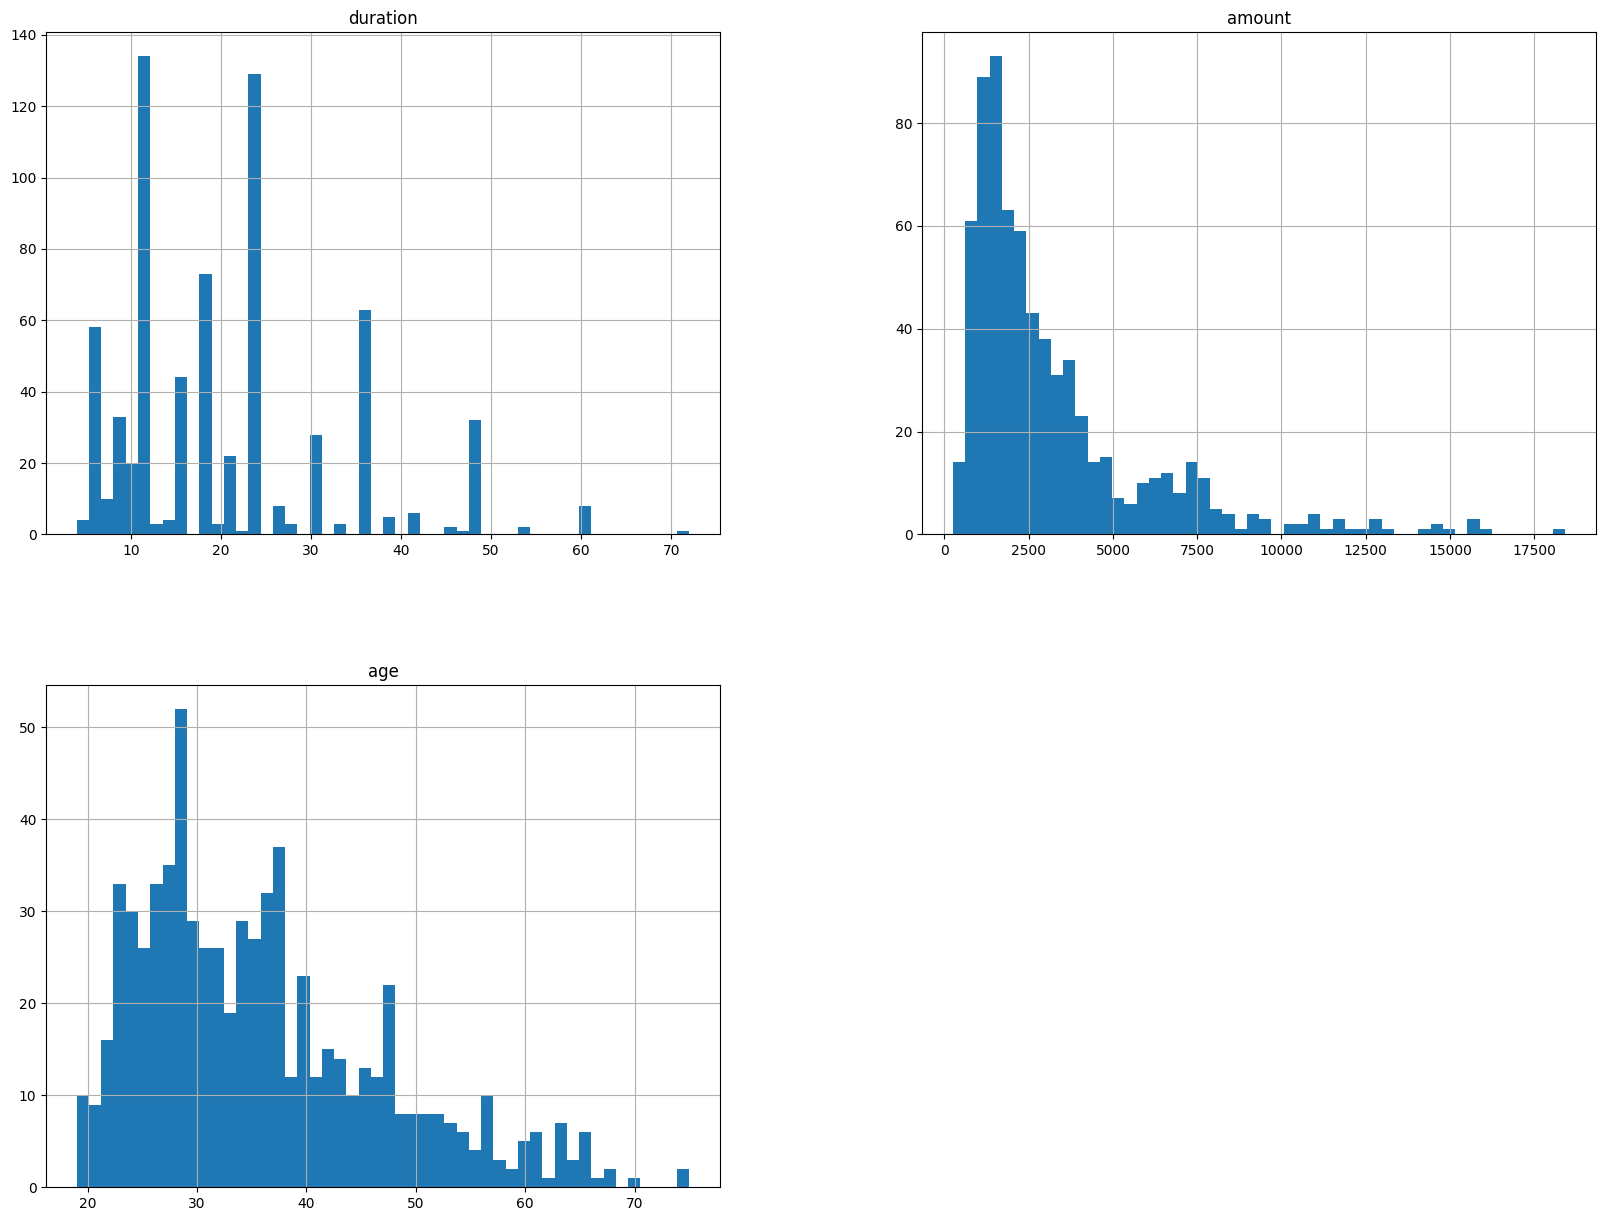

In [140]:
# En esta sección puedes incluir todas las celdas que consideres necesarias para
# visualizar o bien obtener información de cada tipo de variable y te ayude a
# determinar qué transformaciones aplicarás a cada una en el módulo de Pipeline.

Xtrain[lista_paper_num].hist(bins=50,figsize=(20,15))
plt.show()



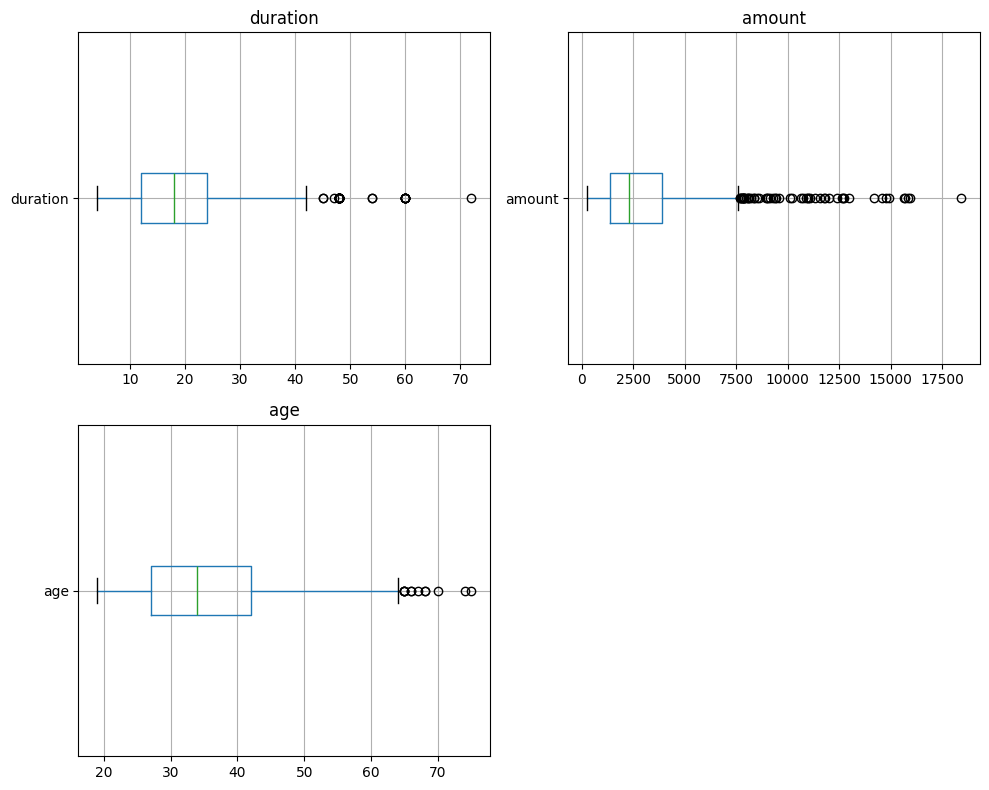

In [141]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, var in zip(axes.flat, lista_paper_num):
    Xtrain.boxplot(column=[var], ax=ax, vert=False)
    ax.set_title(var)
for ax in axes.flat[len(lista_paper_num):]:  # Turns off the extra subplot
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [142]:
for col in lista_paper_ord + lista_paper_cat:
    print(f"Conteo de valores para {col}:")
    print(Xtrain[col].value_counts())
    print("\nFrecuencias relativas:")
    print(Xtrain[col].value_counts() / Xtrain.shape[0])
    print("-" * 40)

Conteo de valores para employment_duration:
employment_duration
3    222
5    194
4    123
2    115
1     46
Name: count, dtype: int64

Frecuencias relativas:
employment_duration
3    0.317143
5    0.277143
4    0.175714
2    0.164286
1    0.065714
Name: count, dtype: float64
----------------------------------------
Conteo de valores para installment_rate:
installment_rate
4    336
2    148
3    114
1    102
Name: count, dtype: int64

Frecuencias relativas:
installment_rate
4    0.480000
2    0.211429
3    0.162857
1    0.145714
Name: count, dtype: float64
----------------------------------------
Conteo de valores para present_residence:
present_residence
4    298
2    207
3    108
1     87
Name: count, dtype: int64

Frecuencias relativas:
present_residence
4    0.425714
2    0.295714
3    0.154286
1    0.124286
Name: count, dtype: float64
----------------------------------------
Conteo de valores para property:
property
3    231
1    204
2    154
4    111
Name: count, dtype: int64

Fr

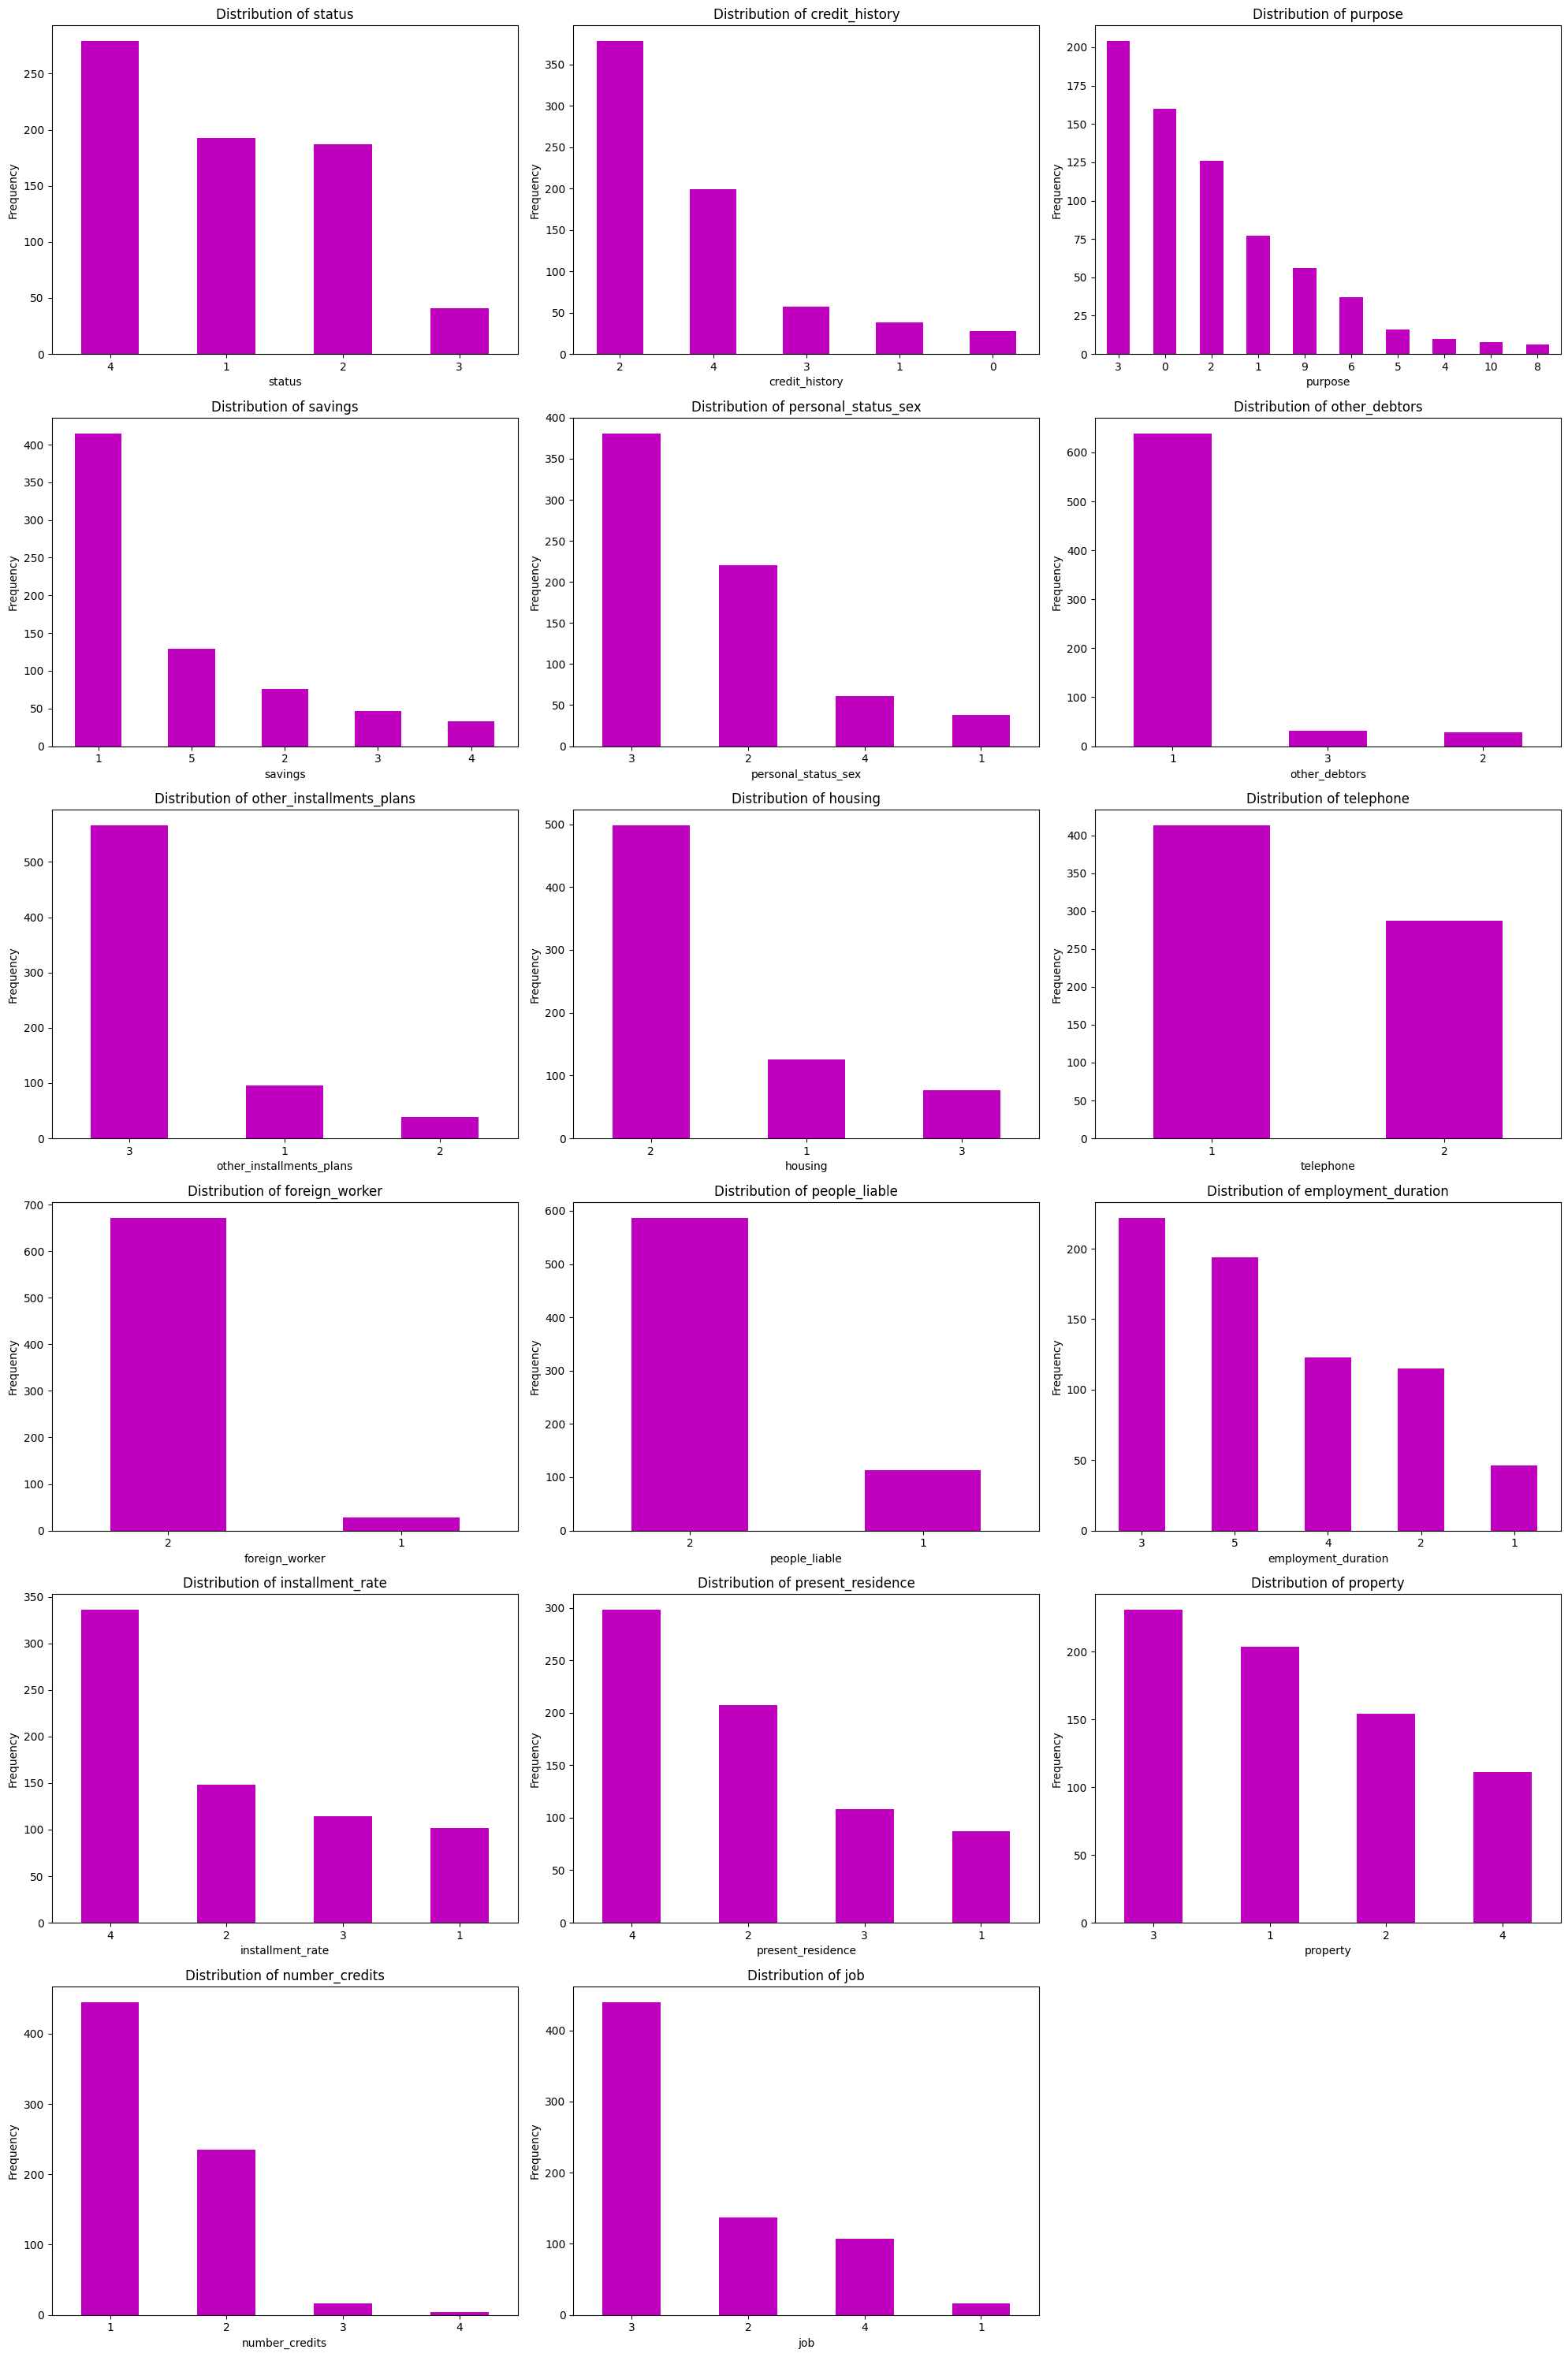

In [143]:
lista_paper_cat_ord = lista_paper_cat + lista_paper_ord

# Seleccionar columnas categóricas y ordinales en Xtrain
categorical_columns_train = Xtrain[lista_paper_cat_ord].columns

# Crear la figura con subgráficos
fig, axes = plt.subplots(math.ceil(len(categorical_columns_train) / 3), 3, figsize=(20, 5 * math.ceil(len(categorical_columns_train) / 3)))
axes = axes.flatten()

# Iterar sobre las columnas y graficar
for i, col in enumerate(categorical_columns_train):
    Xtrain[col].value_counts().plot(kind='bar', ax=axes[i], color='#BF00BF')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)

# Eliminar ejes vacíos si hay menos gráficos que subgráficos creados
for j in range(len(categorical_columns_train), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [144]:
# Una vez analizados los datos de entrada, las transformaciones que se aplicarán
# a cada tipo de variable usando la clase Pipeline de sklearn son las siguientes:


# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
numericas_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler())
])
numericas_pipe_nombres = lista_paper_num




# Variables categóricas-Nominales:
nominales_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot para nominales
])

nominales_pipe_nombres = lista_paper_cat




# Variables categóricas-ordinales:
ordinales_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())  # Codificación ordinal
])
ordinales_pipe_nombres = lista_paper_ord




# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(
    transformers=[
        ("numericas", numericas_pipe, lista_paper_num),
        ("ordinales", ordinales_pipe, lista_paper_ord),
        ("nominales", nominales_pipe, lista_paper_cat)
    ]
)




# *********** Aquí termina la sección de agregar código *************



Xtmp = Xtrain.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de los datos de entrada:")
print("antes de aplicar las transformaciones:", Xtmp.shape)
print("después de aplicar las transformaciones:", tmp.shape)


Dimensión de los datos de entrada:
antes de aplicar las transformaciones: (700, 20)
después de aplicar las transformaciones: (700, 52)


## **Ejercicio 6**

In [145]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento
# y prueba en uno nuevo conjunto aumentado que llamaremos trainval:


# ************* Inlcuye aquí tu código:**************************

encoder = LabelEncoder()
ytrainT = encoder.fit_transform(ytrain)   # Conjunto de entrenamiento
ytestT = encoder.transform(ytest)

Xtraintest = pd.concat([Xtrain, Xtest], axis=0)
ytraintest = pd.concat([pd.Series(ytrainT), pd.Series(ytestT)], axis=0)



# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 52)


## **Ejercicio 7**

In [146]:
# Definimos una función que evaluará cada modelo con diferentes tipos de métricas,
# así como incluyendo algún método de submuestreo o sobremuestreo.

def mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo=None):
        """
        Se lleva a cabo el proceso de entrenamiento y evaluación
        con diferentes métricas.
        Args:
             modelo: modelo con la configuración deseada
             nombre: nombre del modelo
             Xtriantest, ytraintest: Variables de entrada y variable de salida
             mod_uo: método de submuestreo o sobremuestreo, si aplica.
        """

        pipeline = ImbPipeline(steps=[
            ('preprocesamiento', columnasTransformer),
            ('sub_sobre_muestreo', metodo_uo),
            ('model', modelo)
        ])

        micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)
        mismetricas = {
            'miaccuracy': 'accuracy',
            'miprecision': 'precision',
            'mirecall': 'recall',
            'mifi': 'f1',
            'miauc': 'roc_auc',
            'migmean': make_scorer(geometric_mean_score)
        }

        scores = cross_validate(pipeline, Xtraintest, np.ravel(ytraintest), scoring=mismetricas, cv=micv, return_train_score=True)

        print('>> %s' % nombre)
        for j, k in enumerate(list(scores.keys())):
            if j > 1:
                print('\t %s %.4f (%.3f)' % (k, np.nanmean(scores[k]), np.nanstd(scores[k])))



### **Ejercicio 7a: Regresión Logística**

In [147]:
# Regresión Logística - Logistic Regression-LR:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Puedes consultar la siguiente liga para los métodos de submuestreo o sobremuestreo:
# https://imbalanced-learn.org/stable/references/over_sampling.html

# ************* Inlcuye aquí tu código:**************************

nombre = "Regresión_Logística"

# Selecciona la configuración de valores de hiperparámetros que consideres
# te da el mejor desempeño:
modelo = LogisticRegression(max_iter = 2000,    # 10, 100,
                            solver = 'liblinear',
                            C = 10,     # 0.000001, 0.005, 0.01,  1000
                            random_state = 42
                              )

# Selecciona el método de submuestreo o sobremuestreo, si lo deseas incluir.
metodo_uo = SMOTEENN(random_state=42)


# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo,nombre, Xtraintest, ytraintest, metodo_uo)


>> Regresión_Logística
	 test_miaccuracy 0.6387 (0.032)
	 train_miaccuracy 0.6705 (0.021)
	 test_miprecision 0.4446 (0.028)
	 train_miprecision 0.4737 (0.018)
	 test_mirecall 0.8111 (0.063)
	 train_mirecall 0.8575 (0.018)
	 test_mifi 0.5738 (0.034)
	 train_mifi 0.6099 (0.015)
	 test_miauc 0.7606 (0.033)
	 train_miauc 0.7986 (0.013)
	 test_migmean 0.6756 (0.033)
	 train_migmean 0.7111 (0.018)


### **Ejercicio 7b: k-Vecinos Más Cercanos (kNN)**

In [148]:
# k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "k-Nearest-Neighbors"
modelo = KNeighborsClassifier(n_neighbors = 15     # 1, 5, 21, 201
                                      )
metodo_uo = ADASYN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> k-Nearest-Neighbors
	 test_miaccuracy 0.5790 (0.032)
	 train_miaccuracy 0.6518 (0.015)
	 test_miprecision 0.4011 (0.024)
	 train_miprecision 0.4592 (0.012)
	 test_mirecall 0.8100 (0.047)
	 train_mirecall 0.8992 (0.012)
	 test_mifi 0.5360 (0.027)
	 train_mifi 0.6079 (0.012)
	 test_miauc 0.7071 (0.033)
	 train_miauc 0.8256 (0.009)
	 test_migmean 0.6225 (0.031)
	 train_migmean 0.7003 (0.014)


### **Ejercicio 7c: Arbol de decisiones**

In [149]:
# Árbol de decisiones-DecisionTree-DT:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Decision_Tree"
modelo = DecisionTreeClassifier(max_depth = 3,       # None, 5, 3, 1
                                        min_samples_split=10,   # 2,3,5, 20
                                        min_samples_leaf=3,  # trata al inicio de usar solo uno de estos, split o leaf, para su mejor comprensión.
                                        random_state=42
                                        )
metodo_uo = SMOTEENN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Decision_Tree
	 test_miaccuracy 0.6433 (0.032)
	 train_miaccuracy 0.6564 (0.023)
	 test_miprecision 0.4471 (0.029)
	 train_miprecision 0.4605 (0.020)
	 test_mirecall 0.7933 (0.073)
	 train_mirecall 0.8203 (0.034)
	 test_mifi 0.5711 (0.038)
	 train_mifi 0.5892 (0.015)
	 test_miauc 0.7077 (0.043)
	 train_miauc 0.7314 (0.012)
	 test_migmean 0.6763 (0.035)
	 train_migmean 0.6925 (0.018)


### **Ejercicio 7d: Bosque Aleatorio - Random Forest**

In [150]:
# Bosque Aleatorio-RandomForest-RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Random_Forest"
modelo = RandomForestClassifier(n_estimators= 125,    # 100
                                        max_depth= 15,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                        min_samples_split=20,    # 2, 5, 15
                                        random_state=1
                                        )
metodo_uo = SMOTEENN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Random_Forest
	 test_miaccuracy 0.6547 (0.043)
	 train_miaccuracy 0.6995 (0.015)
	 test_miprecision 0.4581 (0.039)
	 train_miprecision 0.5000 (0.014)
	 test_mirecall 0.7978 (0.068)
	 train_mirecall 0.8611 (0.019)
	 test_mifi 0.5812 (0.045)
	 train_mifi 0.6324 (0.011)
	 test_miauc 0.7659 (0.035)
	 train_miauc 0.8340 (0.009)
	 test_migmean 0.6868 (0.044)
	 train_migmean 0.7364 (0.012)


### **Ejercicio 7e: XGBoosting**

In [151]:
# XGBoosting:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
# https://xgboost.readthedocs.io/en/stable/parameter.html


# ************* Inlcuye aquí tu código:**************************

nombre = "XGBoosting"
modelo = XGBClassifier(booster= 'gbtree',
                        n_estimators=50,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                        max_depth= 5,             # 1,3, 6,
                        learning_rate=100,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                        subsample=1.0,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                        random_state=1,
                        objective='binary:logistic',
                        n_jobs=-1)
metodo_uo = SMOTEENN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> XGBoosting
	 test_miaccuracy 0.6503 (0.099)
	 train_miaccuracy 0.6763 (0.103)
	 test_miprecision 0.4628 (0.055)
	 train_miprecision 0.4914 (0.056)
	 test_mirecall 0.7389 (0.104)
	 train_mirecall 0.7933 (0.063)
	 test_mifi 0.5631 (0.048)
	 train_mifi 0.6018 (0.040)
	 test_miauc 0.6870 (0.061)
	 train_miauc 0.7268 (0.062)
	 test_migmean 0.6394 (0.174)
	 train_migmean 0.6739 (0.181)


### **Ejercicio 7f: Red Neuronal Multicapa (MLP)**

In [152]:
# Red neuronal de Perceptrón Multicapa-MLP:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Multiple_Layer_Perceptron"
modelo = MLPClassifier(hidden_layer_sizes=(100,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               learning_rate='adaptive',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               #learning_rate_init=0.001,
                               random_state=42
                               )
metodo_uo = SMOTEENN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Multiple_Layer_Perceptron
	 test_miaccuracy 0.6380 (0.033)
	 train_miaccuracy 0.6775 (0.030)
	 test_miprecision 0.4440 (0.030)
	 train_miprecision 0.4808 (0.027)
	 test_mirecall 0.8089 (0.062)
	 train_mirecall 0.8650 (0.016)
	 test_mifi 0.5727 (0.036)
	 train_mifi 0.6175 (0.023)
	 test_miauc 0.7573 (0.031)
	 train_miauc 0.8036 (0.016)
	 test_migmean 0.6748 (0.034)
	 train_migmean 0.7181 (0.026)


### **Ejercicio 7g: Máquina de Vector Soporte (SVM)**

In [153]:
# Máquina de Vectores de Soporte-SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Support_Vector_Machine"
modelo = SVC(kernel='rbf',
                     C= 0.1,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                     random_state=42
                     )
metodo_uo = SMOTEENN(random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, Xtraintest, ytraintest, metodo_uo)


>> Support_Vector_Machine
	 test_miaccuracy 0.6457 (0.032)
	 train_miaccuracy 0.6697 (0.012)
	 test_miprecision 0.4480 (0.029)
	 train_miprecision 0.4704 (0.010)
	 test_mirecall 0.7622 (0.047)
	 train_mirecall 0.7961 (0.014)
	 test_mifi 0.5637 (0.031)
	 train_mifi 0.5913 (0.008)
	 test_miauc 0.7495 (0.027)
	 train_miauc 0.7839 (0.009)
	 test_migmean 0.6730 (0.030)
	 train_migmean 0.6998 (0.009)


## **Ejercicio 8**

In [154]:
# Incluye el reporte del mejor modelo solicitado en el archivo PDF:

mejor_modelo = RandomForestClassifier(n_estimators= 125,
                                        max_depth= 15,
                                        min_samples_split=20,
                                        random_state=1
                                        )
metodo_uo = SMOTEENN(random_state=42)

pipe = ImbPipeline(steps=[
            ('preprocesamiento', columnasTransformer),
            ('sub_sobre_muestreo', metodo_uo),
            ('model', mejor_modelo)])

# Entrenar el modelo
pipe.fit(Xtraintest, ytraintest)

y_test_pred = pipe.predict((Xtest))

# Calcular métricas en el conjunto de prueba
test_results = {
    "Accuracy (%)": accuracy_score(ytest, y_test_pred),
    "Precision (%)": precision_score(ytest, y_test_pred),
    "Recall (%)": recall_score(ytest, y_test_pred),
    "F1 (%)": f1_score(ytest, y_test_pred),
    "ROC_AUC": roc_auc_score(ytest, y_test_pred),
    "G-Mean": balanced_accuracy_score(ytest, y_test_pred)
}

# Convertir resultados a DataFrame
print(
    "Modelo:", "Random Forest",
    "\nHiperparámetros:", "n_estimators=125, max_depth=15, min_samples_split=10, random_state=1",
    "\nTécnica de sobremuestreo:", "SMOTEENN(random_state=42)"
)

df_test_results = pd.DataFrame([test_results])
df_test_results

Modelo: Random Forest 
Hiperparámetros: n_estimators=125, max_depth=15, min_samples_split=10, random_state=1 
Técnica de sobremuestreo: SMOTEENN(random_state=42)


,Accuracy (%),Precision (%),Recall (%),F1 (%),ROC_AUC,G-Mean
0,0.696667,0.496689,0.833333,0.622407,0.735714,0.735714


## **Ejercicio 9**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El proceso de evaluar cada modelo para comparar y obtener las mejores metricas sin tener modelos subentrenados o sobrentrenados ha sido de gran valor para nuestro entendimiento de cada hiperparametro y su comportamiento dentro de cada modelo. Además, tratar los modelos con datos desbalanceados, nos permitió introducirnos en las técnicas de submuestreo y sobremuestreo, ayudandonos a optimizar los modelos y mejorar la manera de estudiar nuestro conjunto de datos. Cómo se ha de ver, procuramos que todos los modelos no estuvieran sobrentrenados o subentrenados; sin embargo, el modelo de k-Vecinos Más Cercanos (kNN), al tener un solo hiperparametro de variación fue díficil llegar a un resultado favorable.


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**